# Matplotlib Tutorial

This notebook contains a crash course for plotting commonly used charts with matplotlib. It will cover:
1. Common patterns in plotting any chart
    - ...
    - ...
2. The following chart types:
    - ...
    - ...
3. Some advanced techniques
    - ...
    - ...

### Common patterns in plotting any chart

Anatomy of a chart:
- Figure
    - Figure Text
    - Figure Suptitle
- Plot/Axes (or Subplots/Axes in the case of multiple charts in a single figure)
    - x_axis, y_axis (also known as spines)
    - xticks, yticks 
    - legend
    - title
    - text and annotation

That's all!

Rule of thumb: 
- identify the number of dimensions/features to be visualized

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
?plt.style.use

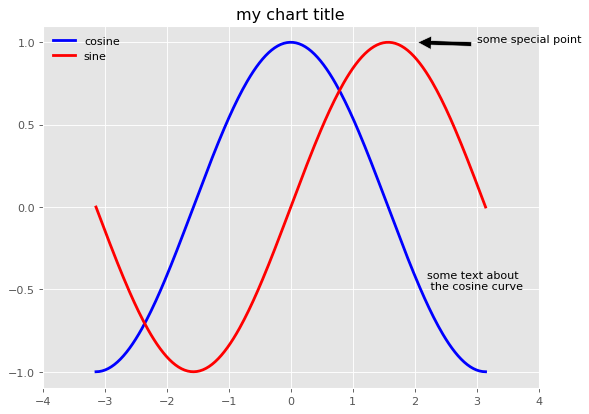

In [196]:
# Recipe 1:
# Note: The settings have been explicitly set to their default values, 
# but now you can interactively play with the values to explore their affect

# Imports
import numpy as np
import matplotlib.pyplot as plt

# Define style of plot. This is a simple addition to make your charts more impressive! 
# TODO: add list of styles available
plt.style.use("ggplot")

# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine using green color with a continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(X.min()*1.1, X.max()*1.1)

# Set x ticks
plt.xticks(np.linspace(math.floor(X.min()), math.ceil(X.max()), 9, endpoint=True))

# Set y limits
plt.ylim(C.min()*1.1, C.max()*1.1)

# Set y ticks
plt.yticks(np.linspace(-1,1,5,endpoint=True))


# Adding legend
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")
plt.legend(loc='upper left', frameon=False)

# Adding title
plt.title('my chart title')

# Adding text
plt.text(2.2, -0.5, 'some text about\n the cosine curve')

# Add annotation
plt.annotate('some special point', xy=(2, 1), xytext=(3, 1),
            arrowprops=dict(facecolor='black', shrink=0.05),)

# Save figure using 72 dots per inch
# plt.savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()

# Clear figure. It's a good practice to explicitly tell Matplotlib to close down the plot when you're working on
# multiple figures/plots
plt.clf()

### 1. Line chart: `.plot()`

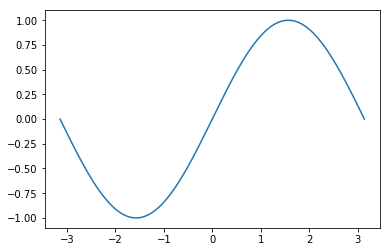

In [2]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
S = np.sin(X)

plt.plot(X,S)
plt.show()

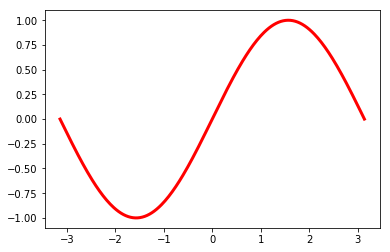

In [9]:
plt.plot(X, S, color="red", linewidth=3.0, linestyle="-")
plt.show()

### 2. Area chart - `.fill_between()`

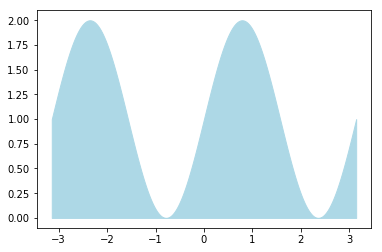

In [50]:
import numpy as np
import matplotlib.pyplot as plt

n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

# plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, Y+1, color='lightblue')
plt.show()

In [ ]:

stacked area chart
histogram
box and whisker plot

bubble chart
density plot (think gaussian distributions)
heatmap
radar chart (spider chart)
tree ma
stream graph

### 3. scatter plot - `.scatter()`

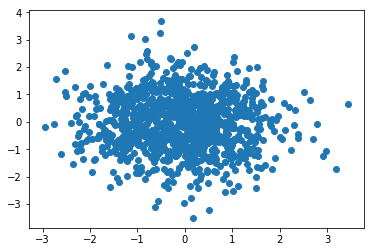

In [53]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()

### 4. bar chart - `.bar()`

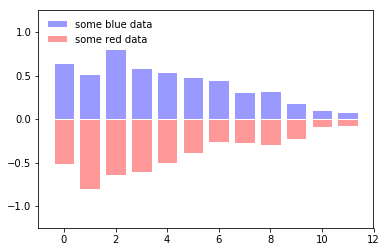

In [57]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white', label='some blue data')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white', label='some red data')

plt.legend(loc='upper left', frameon=False)

plt.ylim(-1.25,+1.25)
plt.show()

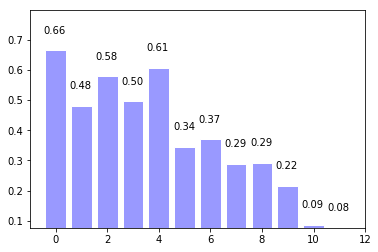

In [67]:
# Adding labels

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='right', va= 'bottom')

plt.ylim(Y1.min(),Y1.max()*1.2)
plt.show()

## Some advanced techniques

### 1. Customizing axis positions

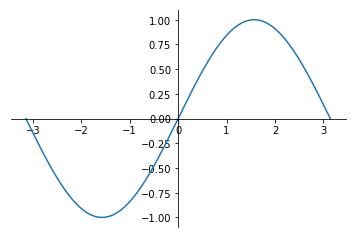

In [32]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
S = np.sin(X)

plt.plot(X,S)
plt.show()

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

### Multiple subplots by using figure, subplot, and axes

- A **figure** is the overall window or page that everything is drawn on. Within this figure there can be subplots.
    - `.figure()` can take in the following parameters: `num`, `figsize`, `dpi`, `facecolor`, `edgecolor`, `frameon`
- **subplots** and **axes** are synonymous, and they allow you to arrange plots in a regular grid.
    - For sublots, you need to specify the number of rows and columns and the number of the plot (e.g. 2,1,1). (Note that the `gridspec` command is a more powerful alternative.)
    - For axxes: 
    
    The Axes is the area on which the data is plotted with functions such as plot() and scatter() and that can have ticks, labels, etc. associated with it. Figures can contain multiple Axes. (TO DELETE)

Note: 
- The only difference between `.add_subplot()` and `.add_axes()` is that the latter gives you the option of absolute positioning. While **subplot** positions the plots in a regular grid, **axes** allows free placement within the figure. In most cases, you’ll use `add_subplot()` to create axes; Only in cases where the positioning matters, you’ll resort to `add_axes()`
- Alternatively, you can also use `subplots()` if you want to get one or more subplots at the same time. You’ll see an example of how this works in the next section.

Note:
- We've already worked with figures and subplots without explicitly calling them. When we call `.plot()`, matplotlib calls `.gca()` to get the current axes and gca in turn calls `.gcf()` to get the current figure. If there is none it calls figure() to make one, strictly speaking, to make a subplot(111).
- When you see, for example, `plt.xlim`, you’ll call `ax.set_xlim()` behind the covers. All methods of an Axes object exist as a function in the pyplot module and vice versa. Note that mostly, you’ll use the functions of the pyplot module because they’re much cleaner, at least for simple plots!

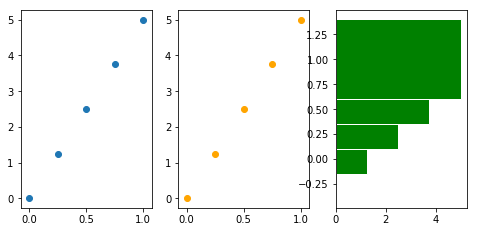

In [152]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a figure + setting the width and hight of the figure in inches
fig = plt.figure(figsize=(8,8))

# Set up Axes
ax1 = fig.add_subplot(231) # The three numbers are (i) the number of rows, (ii) the number of columns and (iii) 
                            # the plot number. The first 2 digits in this case represents a 2 row x 3 column figure
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
    
# Plot the data
ax1.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))
ax2.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5), color='orange')
ax3.barh(np.linspace(0, 1, 5), np.linspace(0, 5, 5), color='green', edgecolor='white')

# Show the plot
plt.show()

In [ ]:
# TODO: Figure out how to customize size of subplots

### Adding titles, legends, axis labels, etc for axes
It is similar to how we add these things to the `plt` object. We only need to add a `.set_` prefix. For example, adding a title would be `ax.set_title('my title')` instead of `plt.title('my title')`

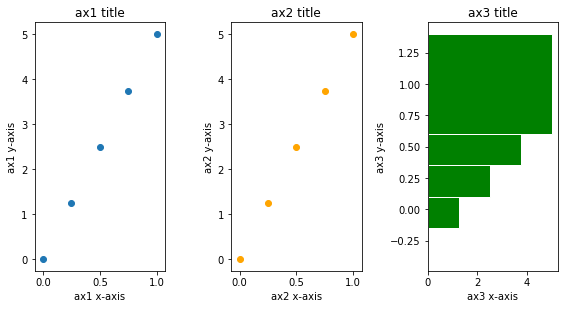

In [175]:

import numpy as np
import matplotlib.pyplot as plt

# Creating a figure + setting the width and hight of the figure in inches
fig = plt.figure(figsize=(8,8))

# Set up Axes
ax1 = fig.add_subplot(231) # The three numbers are (i) the number of rows, (ii) the number of columns and (iii) 
                            # the plot number. The first 2 digits in this case represents a 2 row x 3 column figure
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
    
# Plot the data
ax1.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))
ax2.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5), color='orange')
ax3.barh(np.linspace(0, 1, 5), np.linspace(0, 5, 5), color='green', edgecolor='white')

# Add labels
ax1.set_title('ax1 title')
ax2.set_title('ax2 title')
ax3.set_title('ax3 title')

ax1.set_xlabel('ax1 x-axis')
ax2.set_xlabel('ax2 x-axis')
ax3.set_xlabel('ax3 x-axis')

ax1.set_ylabel('ax1 y-axis')
ax2.set_ylabel('ax2 y-axis')
ax3.set_ylabel('ax3 y-axis')

# Show the plot

plt.tight_layout() # Fix minor alignment issues automagically
plt.show()

In [35]:
### Gridspec

## visualising an entire pandas dataframe
- see tutorial on facebook

### 3D plots

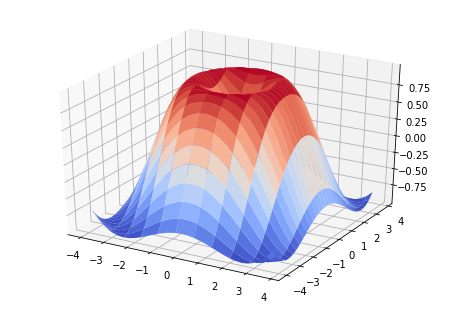

In [102]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=3, cmap='coolwarm')

plt.show()

## Interactive visualisations
To avoid having to type `plt.show()` everytime, you can use `%matplotlib` magic in combination with the `inline` backend option. Read more here: https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook